# Compressive Sensing :
Compressed sensing (CS) is a relatively new technique in the signal processing field which allows acquiring signals while taking few samples. It works for sparse signals and has a few restrictions.

In [2]:
pip install numpy matplotlib cvxpy


### Here we will show that, the original signal had 256 values but we will recover it perfectly even though we will take only 64 random measurements!

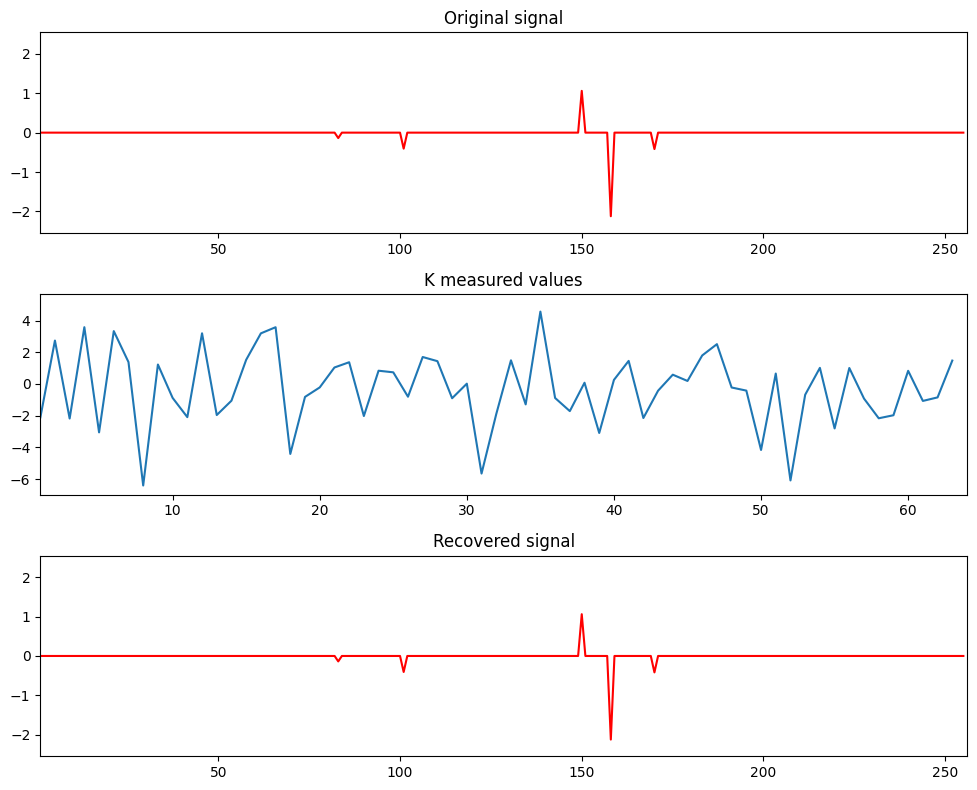

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Initialize constants and variables
np.random.seed(0)                 # set RNG seed
N = 256                           # length of signal
P = 5                             # number of non-zero peaks
K = 64                            # number of measurements to take (N < L)
x = np.zeros(N)                   # original signal (P-sparse)

# Generate signal with P randomly spread values
peaks = np.random.permutation(N)[:P]
x[peaks] = np.random.randn(P)
amp = 1.2 * np.max(np.abs(x))

# Plot original signal
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(x, color='red')
plt.title('Original signal')
plt.xlim([1, N])
plt.ylim([-amp, amp])

# Obtain K measurements
A = np.random.randn(K, N)
y = A @ x

# Plot K measured values
plt.subplot(3, 1, 2)
plt.plot(y)
plt.title('K measured values')
plt.xlim([1, K])

# Perform Compressed Sensing recovery
x0 = A.T @ y

# Define and solve the L1 minimization problem using cvxpy
xp = cp.Variable(N)
objective = cp.Minimize(cp.norm(xp, 1))
constraints = [A @ xp == y]
prob = cp.Problem(objective, constraints)
prob.solve()

# Plot recovered signal
plt.subplot(3, 1, 3)
plt.plot(xp.value, color='red')
plt.title('Recovered signal')
plt.xlim([1, N])
plt.ylim([-amp, amp])
plt.tight_layout()
plt.show()


### We can easily perform this same example by generating a set number of spikes in the frequency domain instead of generating time-domain signals first. The advantage of the method below is that it makes it easier to use real-valued time domain signals to more accurately represent real-life signals.

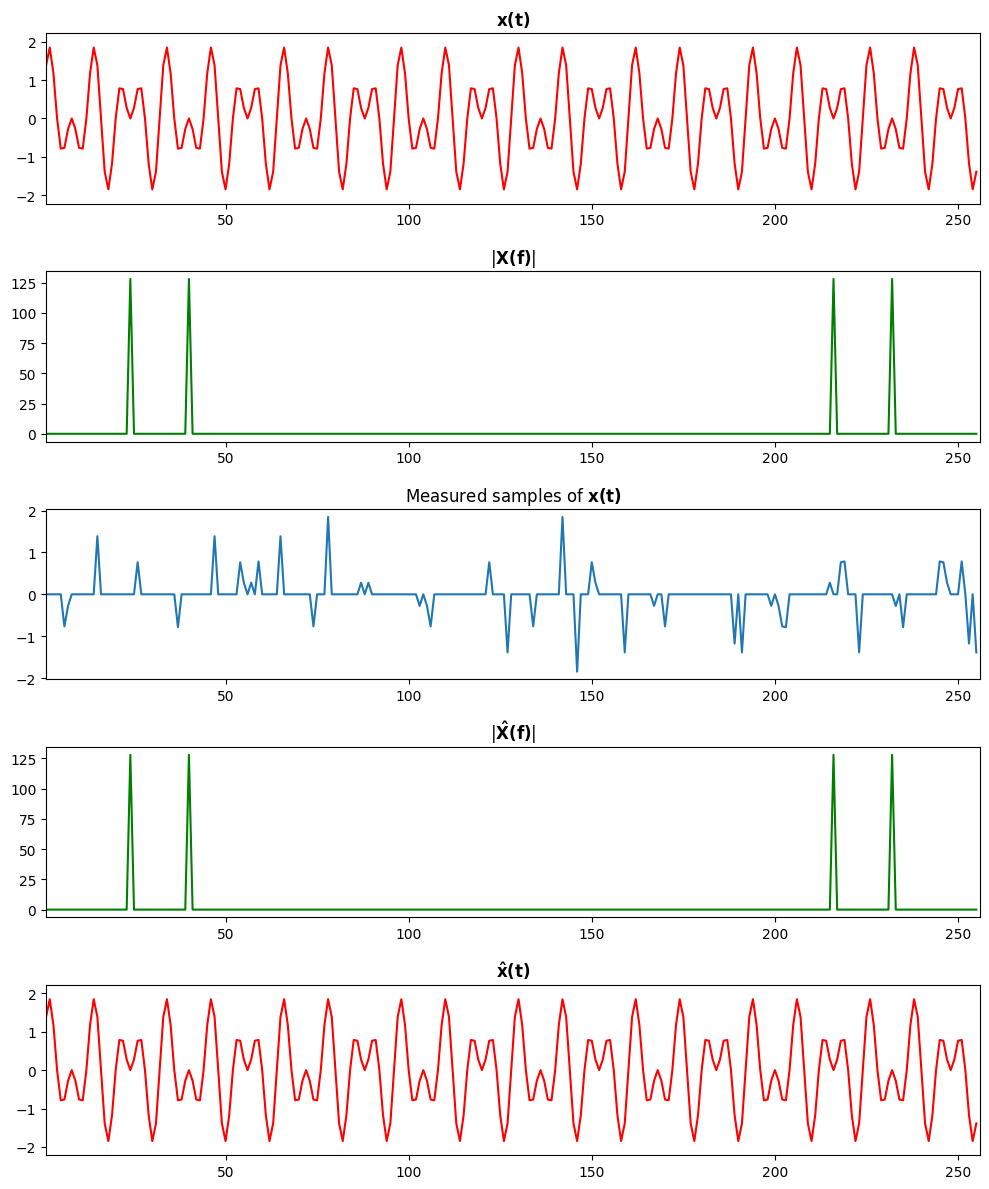

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Initialize constants and variables
np.random.seed(0)                 # set RNG seed
N = 256                           # length of signal
P = 2                             # number of sinusoids
K = 64                            # number of measurements to take (N < L)

# Generate signal with P randomly spread sinusoids
freq = np.random.permutation(N//2)
freq = freq[:P]
n = np.arange(N)
x = np.sum(np.sin(2 * np.pi * freq[:, None] / N * n), axis=0)

# Orthonormal basis matrix
Psi = np.fft.fft(np.eye(N))
Psi_inv = np.conj(Psi) / N
X = Psi @ x                      # FFT of x(t)

# Plot signals
amp = 1.2 * np.max(np.abs(x))
plt.figure(figsize=(10, 12))
plt.subplot(5, 1, 1)
plt.plot(x, color='red')
plt.xlim([1, N])
plt.ylim([-amp, amp])
plt.title(r'$\mathbf{x(t)}$', fontsize=12)

plt.subplot(5, 1, 2)
plt.plot(np.abs(X), color='green')
plt.xlim([1, N])
plt.title(r'$|\mathbf{X(f)}|$', fontsize=12)

# Obtain K measurements
x_m = np.zeros(N)
q = np.random.permutation(N)
q = q[:K]
x_m[q] = x[q]

plt.subplot(5, 1, 3)
plt.plot(np.real(x_m))
plt.xlim([1, N])
plt.title(r'Measured samples of $\mathbf{x(t)}$', fontsize=12)

A = Psi_inv[q, :]                # sensing matrix
y = A @ X                        # measured values

# Perform Compressed Sensing recovery
x0 = A.T @ y

# Define and solve the L1 minimization problem using cvxpy
X_hat = cp.Variable(N, complex=True)
objective = cp.Minimize(cp.norm(X_hat, 1))
constraints = [A @ X_hat == y]
prob = cp.Problem(objective, constraints)
prob.solve()

plt.subplot(5, 1, 4)
plt.plot(np.abs(X_hat.value), color='green')
plt.xlim([1, N])
plt.title(r'$|\mathbf{\hat{X}(f)}|$', fontsize=12)

x_hat = np.real(Psi_inv @ X_hat.value)    # IFFT of X_hat(f)

plt.subplot(5, 1, 5)
plt.plot(x_hat, color='red')
plt.xlim([1, N])
plt.ylim([-amp, amp])
plt.title(r'$\mathbf{\hat{x}(t)}$', fontsize=12)

plt.tight_layout()
plt.show()


###Again, the original time-domain signal had 256 values. However, by taking only 64 individual values from it (25%) we were able to recover all 256 original values!

##Conclusion :
###This differs from first plot in that the signal of interest was sparse not in the time domain, but in the frequency domain. This worked because the sensing basis (spikes) and the representative basis (DFT) are orthogonal to each other.